# Entendimento do Negócio

Analisar as variáveis que possuem maior relevância para o processo de churn de clientes com o objetivo de diminuir essa taxa de evasão.

# Entendimento dos Dados

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

sns.set_theme(style="ticks")

In [2]:
# loading dataset
data_root = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

# shape
print(f'Formato do arquivo: {data_root.shape[0]} linhas e {data_root.shape[1]} colunas')

# checking dataset
data_root.head()

Formato do arquivo: 7267 linhas e 6 colunas


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Existem algumas colunas que possuem dados em foramto de JSON. Iremos extrair os dados dessas colunas e transformá-los em novas colunas com o nome de sua chave, até que ficarmos somente com dados em formato de colunas. Para isso, se faz necessário analisar cada coluna que possui formato JSON.

In [3]:
# checking values of customer column
data_root.customer.loc[0]

{'Dependents': 'Yes',
 'Partner': 'Yes',
 'SeniorCitizen': 0,
 'gender': 'Female',
 'tenure': 9}

In [4]:
# checking values of phone column
data_root.phone.loc[0]

{'MultipleLines': 'No', 'PhoneService': 'Yes'}

In [5]:
# checking values of internet column
data_root.internet.loc[0]

{'DeviceProtection': 'No',
 'InternetService': 'DSL',
 'OnlineBackup': 'Yes',
 'OnlineSecurity': 'No',
 'StreamingMovies': 'No',
 'StreamingTV': 'Yes',
 'TechSupport': 'Yes'}

In [6]:
# checking values of account column
data_root.account.loc[0]

{'Charges': {'Monthly': 65.6, 'Total': '593.3'},
 'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check'}

No primeiro conjunto de dados carregados, existem 6 colunas. São elas:
- **customerID:** é o id único de cada cliente;
- **Churn:** indica se o cliente deixou de ser cliente da empresa ou não;
- **customer:** contém informações específicas do cliente que se subdividem em:
    - **Dependents:** se possui dependentes;
    - **Partner:** se possui parceiro;
    - **SeniorCitizen:** se é idoso ou não;
    - **gender:** o sexo;
    - **tenure:** há quanto tempo (meses?) ele é cliente.
- **phone:** contém informações de serviços telefonicos do cliente:
    - **MultipleLines:** se possui multiplas linhas telefônicas;
    - **PhoneService:** se possui serviço telefônico;
- **internet:** contém informações de serviços de internet do cliente:
    - **DeviceProtection:** se possui serviço de proteção do dispostivo;
    - **InternetService:** se possui serviço de internet e qual;
    - **OnlineBackup:** se possui backup online;
    - **OnlineSecurity:** se possui segurança online;
    - **StreamingMovies:** se possui serviço de streaming de filmes;
    - **StreamingTV:** se possui serviço de streaming de TV;
    - **TechSupport:** se possui suporte técnico.
- **account:** possui informações da conta do cliente:
    - **Charges:** possui informações dos encargos:
        - **Monthly:** encargos mensais;
        - **Total:** encargos totais.
    - **Contract:** informações sobre o tempo de contrato;
    - **PaperlessBilling:** se possui recebimento de conta em papel;
    - **PaymentMethod:** informações sobre o métodos de pagamento.


É preciso criar colunas com os dados que estão dentro dos dicionários. Para isso, criarei uma função que fará essa ação recursivamente, até ter todas as colunas em seu formato ideal.

In [7]:
# fucntion to extract dict from columns
def extract_dict(data):
    data = data.copy()
    x = 0
    while x == 0:
        for i in data.columns:
            if type(data[i].loc[0]) == dict:
                x = 0
                for j in data[i].loc[0].keys():
                    data[j] = data[i].apply(lambda x: x[j])
                data.drop(i, axis = 1, inplace = True)
            else: x = 1

    return data

In [8]:
# applying function to extract dict values
data = extract_dict(data_root)

# checking new dataset
data.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Irei traduzir o nome das colunas para português e deixá-lo de uma maneira mais fácil de manipular.

In [9]:
# get names of all columns
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

In [10]:
# setting names to portuguese
names = {
    'customerID': 'id', # quantitativa discreta
    'Churn': 'churn', # qualitatica nominal
    'gender': 'genero', # qualitativa nominal
    'SeniorCitizen': 'idoso', # qualitativa nominal
    'Partner': 'parceiro', # qualitativa nominal
    'Dependents': 'dependente', # qualitativa nominal
    'tenure': 'permanencia', # quantitativa discreta
    'PhoneService': 'servico_telefonico', # qualitativa nominal
    'MultipleLines': 'multiplas_linhas', # qualitativa nominal
    'InternetService': 'servico_internet', # qualitativa nominal
    'OnlineSecurity': 'seguranca_online', # qualitativa nominal
    'OnlineBackup': 'backup_online', # qualitativa nominal
    'DeviceProtection': 'protecao_dispositivo', # qualitativa nominal
    'TechSupport': 'suporte_tecnico', # qualitativa nominal
    'StreamingTV': 'tv_streaming', # qualitativa nominal
    'StreamingMovies': 'filme_streaming', # qualitativa nominal
    'Contract': 'contrato', # qualitativa nominal
    'PaperlessBilling': 'conta_papel', # qualitativa nominal
    'PaymentMethod': 'metodo_pagamento', # qualitativa nominal
    'Monthly': 'mensal', # qualitativa contínua
    'Total': 'total' # qualitativa contínua
}

data.rename(columns = names, inplace = True)

## Exploratory Data Analysis (EDA)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   parceiro              7267 non-null   object 
 5   dependente            7267 non-null   object 
 6   permanencia           7267 non-null   int64  
 7   servico_telefonico    7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  tv_streaming          7267 non-null   object 
 15  filme_streaming      

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
idoso,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
permanencia,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
mensal,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75


Primeiro irei analisar se as colunas possuem valores nulos.

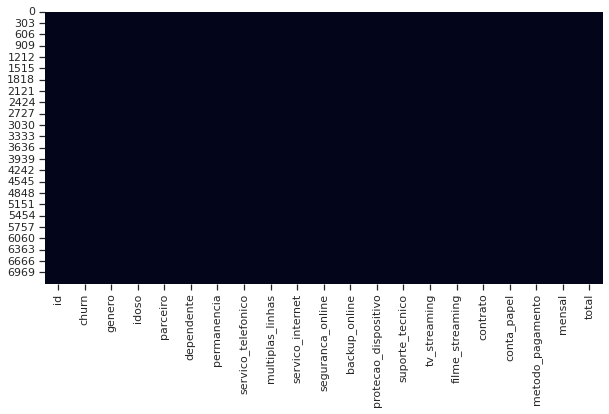

In [14]:
plt.figure(figsize = (10, 5))

sns.heatmap(data.isna(), cbar = False)

plt.show()

Aparentemente, o dataset não possui nenhum dado nulo, porém, será necessário análisá-lo de forma mais profunda.

Para explorar cada coluna e saber de forma detalhada o que essa coluna possui, quais são os tipos de dados que estão armazenados nelas, os valores que possum e qual a sua cardinalidade, no caso de dados categóricos, criarei uma função para automatizar essa tarefa.

In [15]:
# função para devolver alguns detalhes de cada coluna
def column_analysis(data, column, dataframe = False):
    # print('-' * 25)
    # print(f'Nome:          {column}')
    # print(f'Cardinalidade: {data[column].nunique()}')
    # print(f'Dados únicos:  {data[column].unique()}')
    # print(f'Tipo:          {data[column].dtypes}')
    
    return (column, data[column].nunique(), str(data[column].unique()), data[column].isna().sum(), data[column].dtypes)

In [16]:
# columns analysis
columns_descriptions = []

for column in data.columns:
    column_description = column_analysis(data, column)
    columns_descriptions.append(column_description)

pd.DataFrame(columns_descriptions, columns = ['nome', 'cardinalidade', 'dados_unicos', 'dados_nulos', 'tipo'])

,nome,cardinalidade,dados_unicos,dados_nulos,tipo
0,id,7267,['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9...,0,object
1,churn,3,['No' 'Yes' ''],0,object
2,genero,2,['Female' 'Male'],0,object
3,idoso,2,[0 1],0,int64
4,parceiro,2,['Yes' 'No'],0,object
5,dependente,2,['Yes' 'No'],0,object
6,permanencia,73,[ 9 4 13 3 71 63 7 65 54 72 5 56 34 1 45 ...,0,int64
7,servico_telefonico,2,['Yes' 'No'],0,object
8,multiplas_linhas,3,['No' 'Yes' 'No phone service'],0,object
9,servico_internet,3,['DSL' 'Fiber optic' 'No'],0,object


- **id**: ✓
- **churn**: transformar para binários e analisar valores vazios
- **genero**: transfomar para dados binários
- **idoso**: ✓
- **parceiro**: transfomar para dados binários
- **dependente**: transfomar para dados binários
- **permanencia**: ✓
- **servico_telefonico**: transformar para binários
- **multipĺas_linhas**: transformar para dados categóricos
- **servico_internet**: transformar para dados categóricos
- **seguranca_online**: transformar para dados categóricos
- **backup_online**: transformar para dados categóricos
- **protecao_dispositivo**: transformar para dados categóricos
- **suporte_tecnico**: transformar para dados categóricos
- **tv_streaming**: transformar para dados categóricos
- **filme_streaming**: transformar para dados categóricos
- **contrato**: transformar para dados categóricos
- **conta_papel**: transformar para dados binários
- **metodo_pagamento**: transformar para dados categóricos
- **mensal**: ✓
- **total**: transformar para dados quantitativos continuos

#### Coluna **'churn'**

Primeiro, irei tratar os dados nulos da coluna churn, para que essas células fiquem rastreáveis como 'nan'.

In [17]:
data.churn.replace({'': np.nan}, inplace = True)

Agora, irei analisar como estão distribuidos os dados da coluna 'churn'.

In [21]:
data.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

Usando a função 'value_counts()' não é possível observar os valores nulos. Para verificar quantos valores nulos existem, irei utilizar a função 'groupby' com o parâmetro 'dropna = False'.

In [20]:
data.groupby(['churn'], dropna = False).size()

churn
No     5174
Yes    1869
NaN     224
dtype: int64

In [22]:
# # transforming values of 'Yes' and 'No' to 1 and 0
# data.churn.replace({'No': 0, 'Yes': 1}, inplace = True)

É possível observar que existem 224 dados com valores nulos nessa coluna. Como essa coluna é nossa coluna target, não é possível tomar outra atitude senão descartar os dados que possuem esses valores nulos, porém, serão utilizados posteriormente como forma de validação do modelo.

#### Coluna **'genero'**

In [152]:
# # transforming values
# data.genero.replace({'Male': 0, 'Female': 1}, inplace = True)

#### Coluna **'idoso'**

In [53]:
#
data.idoso.replace({0: 'No', 1: 'Yes'}, inplace = True)

#### Coluna 'parceiro', 'dependente', 'servico_telefonico' e 'conta_papel'

Para as variáveis numéricas, temos o seguinte:
- 7 variáveis binárias: 'churn', 'genero', 'idoso', 'parceiro', 'dependente', 'servico_telefonico' e 'conta_papel';
- 2 variáveis contínuas: 'mensal' e 'total';
- 1 variável discreta: 'permanencia'.

In [23]:
numerical_columns = ['churn', 'genero', 'idoso', 'parceiro', 'dependente', 'permanencia', 'servico_telefonico', 'conta_papel', 'mensal', 'total']

target_column = ['churn']
binary_columns = ['genero', 'idoso', 'parceiro', 'dependente', 'servico_telefonico', 'conta_papel']
continuous_columns = ['permanencia', 'mensal', 'total']

# for column in numerical_columns:
#     data[column] = pd.to_numeric(data[column].replace({'No': 0, 'Yes': 1}))

#### Coluna 'multiplas_linhas'...

In [24]:
nominal_columns = ['multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filme_streaming', 'contrato', 'metodo_pagamento']

for column in nominal_columns:
    data[column] = data[column].astype('category')

#### Coluna 'total', 'mensal' e 'permanencia'

Pela primeira análise, foi possível observar que a coluna 'total' está no formato object, porém, é necessário que ela fique no formato 'float'. Para isso, utilizarei a função 'pd.to_numeric(coluna)' para transformar os dados em numéricos.

In [29]:
# data.total = pd.to_numeric(data.total) ### se adicionar "errors = 'coerce'" você preenche os valores nulos com 'nan'

Ao utlizar a função, foi retornado um erro. Tudo indica que existem valores nulos nessa coluna também. Então, utilziarei a função 'describe()' para ver o que irá retornar.

In [32]:
data.total.describe()

count     7267
unique    6531
top           
freq        11
Name: total, dtype: object

Existe uma frequência de 11 vezes de um valor vazio. Então vou analisar melhor para entender o porque disso.

In [34]:
data[data.total == '']

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total


In [54]:
data[data.total == ' ']

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total


In [55]:
data[data.permanencia == 0]

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25
2308,3213-VVOLG,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
2930,4075-WKNIU,No,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35
3134,4367-NUYAO,No,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75
3203,4472-LVYGI,No,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
4169,5709-LVOEQ,No,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85


Analisando os valores das outras colunas quando a coluna 'total' possui os valores vazios, é possível observar que o tempo de permanência dessas linhas possui o valor 0. Isso indica que a pessoa acabou de entrar na base de dados, então, não possui um valor total ainda. sendo assim, irei preencher os valores dessas colunas com o valor da coluna 'mensal', indicando o valor total de gasto daquela pessoa até o momento. Mas primeiro, será necessário trocar os valores vazios para 'nan'.

In [48]:
# fill with nan values
data.total.replace({' ': np.nan}, inplace = True)

# fill null values in 'total'
data.total.fillna(data.mensal, inplace = True)

In [49]:
# checking
data[data.total.isna()]

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total


Agora, verei se será possível colocá-la no formato 'float'.

In [50]:
# transforming column to numeric
data.total = pd.to_numeric(data.total)

In [51]:
# checking
data[data.permanencia == 0]

,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,56.05
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,20.00
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,61.90
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,19.70
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,20.25
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,25.35
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,73.35
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,25.75
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,52.55
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,80.85


Agora é possível analisar as colunas com dados quantitativos (numéricos) irei utilizar a função 'describe()', a qual retorna alguns dados estatísticos descritivos dessas colunas.

In [52]:
data.loc[:, continuous_columns].describe()

,permanencia,mensal,total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.244730
std,24.571773,30.129572,2268.586391
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,396.200000
50%,29.000000,70.300000,1389.200000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


Com os dados limpos, agora é preciso separar os dados que contém a variável target nula, pois neste momento, não serão utilizados.

In [56]:
# data[~data.churn.isna()].to_csv('/content/drive/MyDrive/Alura/dados/data_cleaned.csv')

In [57]:
# data[data.churn.isna()].to_csv('/content/drive/MyDrive/Alura/dados/data_cleaned_validation.csv')